In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from rouge import Rouge
import re


# 설치된 폰트를 Matplotlib에 적용
import matplotlib.font_manager as fm

In [8]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 리눅스의 경우

#!apt install fonts-nanum

plt.rcParams['font.family'] = 'NanumGothic'  # 'Noto Sans CJK KR'도 가능

# 폰트 경로 설정
font_dir = "/usr/share/fonts/truetype/nanum"
font_files = fm.findSystemFonts(fontpaths=font_dir)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [9]:
# 데이터 불러오기
file_path = '/home/data/train.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

달러 단위 변환

In [10]:
import re

# 입력 텍스트
text = "피자는 $   8 . 25였고 음료수는 $  5.  90이었다."

# 정규식으로 변환
# 첫 번째 그룹은 정수 부분, 두 번째 그룹은 소수 부분, 그 사이의 공백을 무시하고 변환
converted_text = re.sub(r"\$\s*([\d]+)\s*\.\s*([\d]+)", r"\1.\2달러", text)

# 결과 출력
print(converted_text)


피자는 8.25달러였고 음료수는 5.90달러이었다.


In [11]:
완료
import re
# 정규식을 사용해 달러 표기를 변환
for i in range(len(data)):
    
    #print(data['dialogue'][i])
    data['dialogue'][i] = re.sub(r"\$\s*([\d]+)", r"\1달러", data['dialogue'][i])
    data['dialogue'][i] = re.sub(r"\$\s*([\d]+)\s*\.\s*([\d]+)", r"\1.\2달러", data['dialogue'][i])
    print(data['dialogue'][i])
    
    #print(data['summary'][i])
    data['summary'][i] = re.sub(r"\$\s*([\d]+)", r"\1달러", data['summary'][i])
    data['summary'][i] = re.sub(r"\$\s*([\d]+)\s*\.\s*([\d]+)", r"\1.\2달러", data['summary'][i])
    print(data['summary'][i])

data.to_csv("/home/data/train_달러.csv")
# 변환된 결과 출력
#print(result)


NameError: name '완료' is not defined

In [13]:
# 1 line test

rouge = Rouge()

dialog = data['dialogue'][0]
summary = "스미스는 건강검진을 받기 위해 의사 호킨스를 방문한다. 5년 동안 검진을 받지 않은 스미스에게 의사는 매년 검진의 중요성을 강조하며 조기 발견이 질병 예방에 효과적이라고 설명한다. 검진 중, 스미스가 흡연자임을 밝히자 의사는 금연의 필요성을 강조하며, 도움을 줄 수 있는 프로그램과 약물을 제공하겠다고 한다."

print(dialog, "\n\n")
print(summary)

results = rouge.get_scores(dialog, summary, avg=True)
mean = (results['rouge-1']['f'] + results['rouge-2']['f'] + results['rouge-l']['f'])/3
print("    rouge-1:", str(round(results['rouge-1']['f'],4)).ljust(7),
    "    rouge-2:", str(round(results['rouge-2']['f'],4)).ljust(7),
    "    rouge-L:", str(round(results['rouge-l']['f'],4)).ljust(7),
    "    mean:", str(round(mean, 4)).ljust(7))



#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나요?
#Person2#: 건강검진을 받는 것이 좋을 것 같아서요.
#Person1#: 그렇군요, 당신은 5년 동안 건강검진을 받지 않았습니다. 매년 받아야 합니다.
#Person2#: 알고 있습니다. 하지만 아무 문제가 없다면 왜 의사를 만나러 가야 하나요?
#Person1#: 심각한 질병을 피하는 가장 좋은 방법은 이를 조기에 발견하는 것입니다. 그러니 당신의 건강을 위해 최소한 매년 한 번은 오세요.
#Person2#: 알겠습니다.
#Person1#: 여기 보세요. 당신의 눈과 귀는 괜찮아 보입니다. 깊게 숨을 들이쉬세요. 스미스씨, 담배 피우시나요?
#Person2#: 네.
#Person1#: 당신도 알다시피, 담배는 폐암과 심장병의 주요 원인입니다. 정말로 끊으셔야 합니다. 
#Person2#: 수백 번 시도했지만, 습관을 버리는 것이 어렵습니다.
#Person1#: 우리는 도움이 될 수 있는 수업과 약물들을 제공하고 있습니다. 나가기 전에 더 많은 정보를 드리겠습니다.
#Person2#: 알겠습니다, 감사합니다, 의사선생님. 


스미스는 건강검진을 받기 위해 의사 호킨스를 방문한다. 5년 동안 검진을 받지 않은 스미스에게 의사는 매년 검진의 중요성을 강조하며 조기 발견이 질병 예방에 효과적이라고 설명한다. 검진 중, 스미스가 흡연자임을 밝히자 의사는 금연의 필요성을 강조하며, 도움을 줄 수 있는 프로그램과 약물을 제공하겠다고 한다.
    rouge-1: 0.1151      rouge-2: 0.026       rouge-L: 0.1151      mean: 0.0854 


In [14]:
rouge = Rouge()

rouge_values = []

for i in range(len(data)):
    results = rouge.get_scores(data['dialogue'][i], data['summary'][i], avg=True)
    mean = (results['rouge-1']['f'] + results['rouge-2']['f'] + results['rouge-l']['f'])/3
    print(str(data['fname'][i]).ljust(12),
        "    rouge-1:", str(round(results['rouge-1']['f'],4)).ljust(7),
        "    rouge-2:", str(round(results['rouge-2']['f'],4)).ljust(7),
        "    rouge-L:", str(round(results['rouge-l']['f'],4)).ljust(7),
        "    mean:", str(round(mean, 4)).ljust(7)
        )
    value = (round(results['rouge-1']['f'],4),
            round(results['rouge-2']['f'],4),
            round(results['rouge-l']['f'],4),
            round(mean, 4)
            )
    rouge_values.append(value)
    
    #result = {key: value["f"]  for key, value in results.items()}

print(rouge_values)
rouge_df = pd.DataFrame(rouge_values)

train_0          rouge-1: 0.1803      rouge-2: 0.0719      rouge-L: 0.1803      mean: 0.1442 
train_1          rouge-1: 0.125       rouge-2: 0.0185      rouge-L: 0.125       mean: 0.0895 
train_2          rouge-1: 0.0635      rouge-2: 0.0282      rouge-L: 0.0635      mean: 0.0517 
train_3          rouge-1: 0.1127      rouge-2: 0.0227      rouge-L: 0.1127      mean: 0.0827 
train_4          rouge-1: 0.1111      rouge-2: 0.025       rouge-L: 0.1111      mean: 0.0824 
train_5          rouge-1: 0.0444      rouge-2: 0.0         rouge-L: 0.0444      mean: 0.0296 
train_6          rouge-1: 0.0         rouge-2: 0.0         rouge-L: 0.0         mean: 0.0    
train_7          rouge-1: 0.2282      rouge-2: 0.1215      rouge-L: 0.2282      mean: 0.1926 
train_8          rouge-1: 0.0727      rouge-2: 0.0323      rouge-L: 0.0727      mean: 0.0592 
train_9          rouge-1: 0.1702      rouge-2: 0.0333      rouge-L: 0.1702      mean: 0.1246 
train_10         rouge-1: 0.1818      rouge-2: 0.0684      r

In [15]:
# 대화와 요약의 길이 계산
data['dia_len'] = data['dialogue'].apply(len)
data['sum_len'] = data['summary'].apply(len)

data['Rouge-1'] = rouge_df[0]
data['Rouge-2'] = rouge_df[1]
data['Rouge-L'] = rouge_df[2]
data['mean'] = rouge_df[3]
data

,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
0,train_0,"#Person1#: 안녕하세요, 스미스씨. 저는 호킨스 의사입니다. 오늘 왜 오셨나...","스미스씨가 건강검진을 받고 있고, 호킨스 의사는 매년 건강검진을 받는 것을 권장합니...",건강검진 받기,575,107,0.1803,0.0719,0.1803,0.1442
1,train_1,"#Person1#: 안녕하세요, 파커 부인, 어떻게 지내셨나요?\n#Person2#...",파커 부인이 리키를 데리고 백신 접종을 하러 갔다. 피터스 박사는 기록을 확인한 후...,백신,457,61,0.1250,0.0185,0.1250,0.0895
2,train_2,"#Person1#: 실례합니다, 열쇠 한 묶음 보셨나요?\n#Person2#: 어떤...","#Person1#은 열쇠 한 묶음을 찾고 있고, 그것을 찾기 위해 #Person2#...",열쇠 찾기,340,62,0.0635,0.0282,0.0635,0.0517
3,train_3,#Person1#: 왜 너는 여자친구가 있다는 걸 말해주지 않았어?\n#Person...,#Person1#은 #Person2#가 여자친구가 있고 그녀와 결혼할 것이라는 사실...,여자친구가 있다,378,78,0.1127,0.0227,0.1127,0.0827
4,train_4,"#Person1#: 안녕, 숙녀분들! 오늘 밤 당신들은 정말 멋져 보여. 이 춤을 ...",말릭이 니키에게 춤을 요청한다. 말릭이 발을 밟는 것을 신경 쓰지 않는다면 니키는 ...,댄스,313,51,0.1111,0.0250,0.1111,0.0824
...,...,...,...,...,...,...,...,...,...,...
12452,train_12455,#Person1#: 실례합니다. 맨체스터 출신의 그린 씨이신가요?\n#Person2...,탄 링은 흰머리와 수염으로 쉽게 인식되는 그린 씨를 만나 호텔로 데려갈 예정입니다....,누군가를 태우다,787,79,0.1127,0.0233,0.1127,0.0829
12453,train_12456,#Person1#: 이윙 씨가 우리가 컨퍼런스 센터에 오후 4시에 도착해야 한다고 ...,#Person1#과 #Person2#는 이윙 씨가 늦지 않도록 요청했기 때문에 컨퍼...,컨퍼런스 센터,302,72,0.1842,0.0500,0.1579,0.1307
12454,train_12457,#Person1#: 오늘 어떻게 도와드릴까요?\n#Person2#: 차를 빌리고 싶...,#Person2#는 #Person1#의 도움으로 5일 동안 소형 차를 빌립니다.,차 렌트,350,44,0.1017,0.0000,0.0678,0.0565
12455,train_12458,#Person1#: 오늘 좀 행복해 보이지 않아. 무슨 일 있어?\n#Person2...,#Person2#의 엄마가 일자리를 잃었다. #Person2#는 엄마가 우울해하지 ...,실직,477,105,0.1346,0.0684,0.1346,0.1125


In [16]:
view1 = data[data['mean'] == 0]
print(len(view1))

647


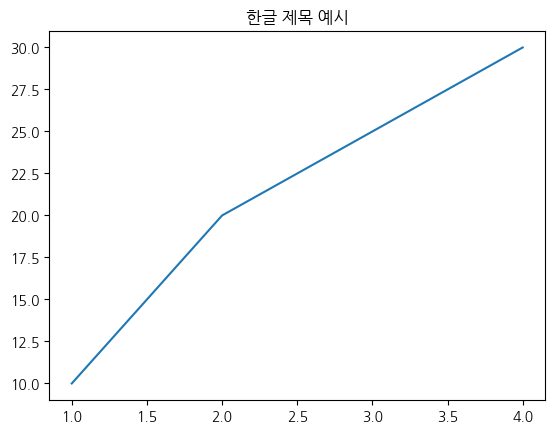

In [17]:
### 설치 확인
# 한글 폰트 설정 (NanumGothic 또는 Noto Sans CJK KR)
plt.rcParams['font.family'] = 'NanumGothic'  # 'Noto Sans CJK KR'도 가능

# 샘플 데이터와 한글 제목
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y)
plt.title('한글 제목 예시')  # 한글 제목

# 그래프 표시
plt.show()


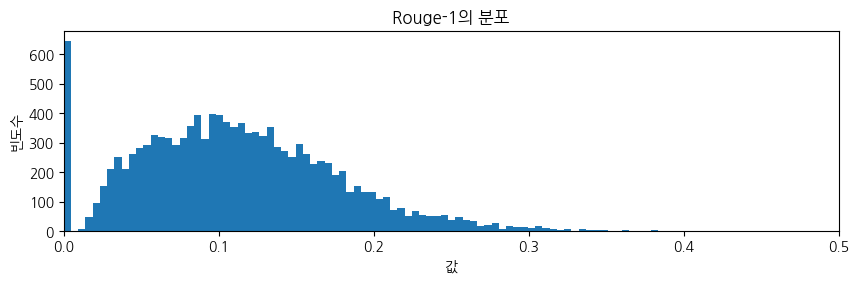

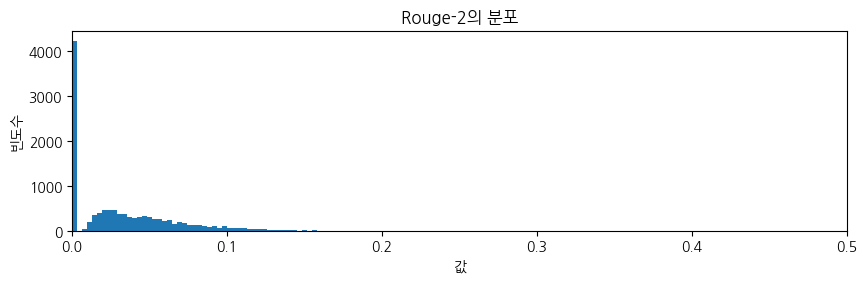

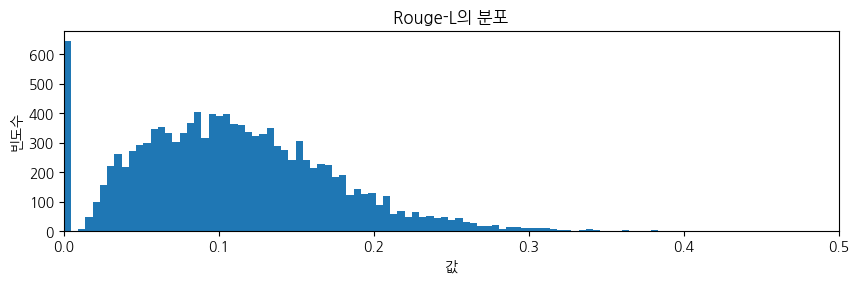

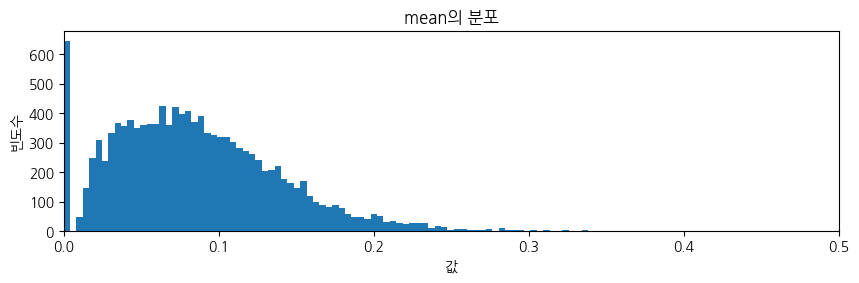

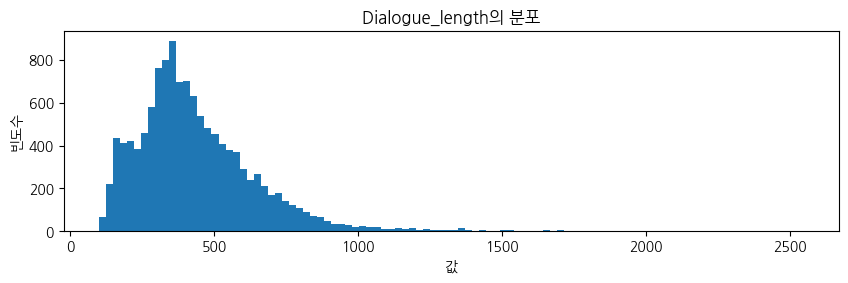

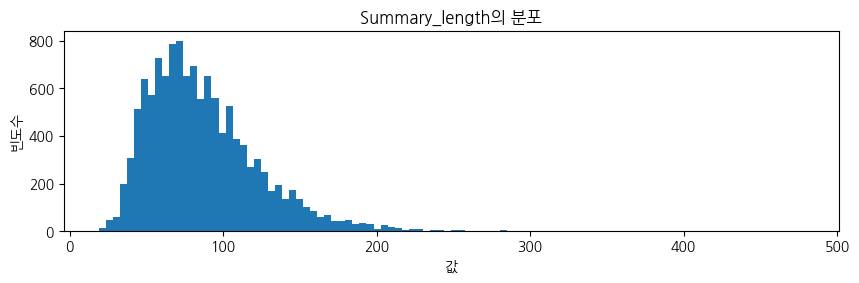

In [18]:
ticks = []
j = 0

for i in range(50) :
    ticks.append(j)
    j += 0.01

ii = [data['Rouge-1'], data['Rouge-2'], data['Rouge-L'], data['mean']]
iname = ['Rouge-1', 'Rouge-2', 'Rouge-L', 'mean']
for i in range(4):
    # 히스토그램 그리기
    #fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2행 2열, 전체 플롯 크기 지정
    plt.figure(figsize=(10, 2.6))
    plt.hist(ii[i], bins=100)
    # 그래프 제목과 레이블 설정
    plt.title(iname[i] + '의 분포')
    plt.xlabel('값')
    plt.ylabel('빈도수')
    plt.xlim(0, 0.5)
    #plt.xticks(ticks)
    # 그래프 보여주기
    plt.show()
    
ii = [data['dia_len'], data['sum_len']]
iname = ['Dialogue_length', 'Summary_length']
for i in range(2):
    # 히스토그램 그리기
    #fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2행 2열, 전체 플롯 크기 지정
    plt.figure(figsize=(10, 2.6))
    plt.hist(ii[i], bins=100)
    # 그래프 제목과 레이블 설정
    plt.title(iname[i] + '의 분포')
    plt.xlabel('값')
    plt.ylabel('빈도수')
    #plt.xlim(0, 0.5)
    #plt.xticks(ticks)
    # 그래프 보여주기
    plt.show()



In [19]:
data.columns

Index(['fname', 'dialogue', 'summary', 'topic', 'dia_len', 'sum_len',
       'Rouge-1', 'Rouge-2', 'Rouge-L', 'mean'],
      dtype='object')

In [20]:
view1 = data[data['Rouge-1'] == 0]
view2 = data[data['Rouge-2'] == 0]
viewL = data[data['Rouge-L'] == 0]
viewm = data[data['mean'] == 0]
display(view1)
display(view2)
display(viewL)
display(viewm)

,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
5,train_5,"#Person1#: 생일 축하해, 에임즈!\n#Person2#: 고마워, 리사.\n...",리사가 에임즈에게 생일 선물을 주고 에임즈는 그것을 매우 좋아한다.,생일,202,37,0.0444,0.0,0.0444,0.0296
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0000,0.0,0.0000,0.0000
13,train_13,#Person1#: 키이스는 몇 살인가요?\n#Person2#: 그는 21살입니다....,#Person1#와 #Person2#는 가족들의 나이에 대해 이야기하고 있습니다. ...,나이,422,83,0.0759,0.0,0.0759,0.0506
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0000,0.0,0.0000,0.0000
19,train_19,#Person1#: 그럼 우리와 함께 일하러 올 건가요?\n#Person2#: 제 ...,"#Person1#은 데이브에게 함께 일하는 것을 제안하고, 데이브는 동의한다.",함께 일하기,262,43,0.0357,0.0,0.0357,0.0238
...,...,...,...,...,...,...,...,...,...,...
12430,train_12433,#Person1#: 너희들이 저기서 뭘 하고 있는 거야?\n#Person2#: 어떤...,제니스는 응답을 기다리지만 #Person2#는 그것이 그들의 손에 달린 것이 아니라...,기다리는 중,195,53,0.0435,0.0,0.0435,0.0290
12434,train_12437,#Person1#: 우리의 연결 항공편은 몇 시에 있나요?\n#Person2#: 확...,#Person1#과 #Person2#는 항공편과 게이트 번호에 대해 이야기합니다. ...,연결 항공편,294,66,0.0678,0.0,0.0678,0.0452
12441,train_12444,"#Person1#: 안녕하세요.\n#Person2#: 안녕하세요, 톰님. 창작 글쓰...",다이애나는 톰에게 출판을 원하는 사람들을 지원하기 위해 새로 설립한 작가 그룹에 가...,작가 그룹,709,100,0.0516,0.0,0.0387,0.0301
12446,train_12449,#Person1#: 존슨 가족이 돌아오는 길이에요. 기억나시죠? \n#Person2...,#Person2#는 #Person1#이 어떻게 설명하든 존슨 가족을 기억하지 못한다.,기억,261,47,0.0435,0.0,0.0435,0.0290


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


,fname,dialogue,summary,topic,dia_len,sum_len,Rouge-1,Rouge-2,Rouge-L,mean
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...,#Person1#이 #Person2#에게 택시 요금을 알려줍니다.,요금 지불하기,179,36,0.0,0.0,0.0,0.0
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...,#Person1#은 #Person2#에게 그 남자의 말로 인해 혼란스러움을 느꼈다고...,혼란스러움,178,52,0.0,0.0,0.0,0.0
105,train_105,#Person1#: 어떤 춤을 좋아하나요?\n#Person2#: 저는 빠른 음악에 ...,#Person2#는 디스코를 좋아하므로 #Person1#과 #Person2#는 디스...,춤,299,77,0.0,0.0,0.0,0.0
129,train_129,"#Person1#: 신고하고 싶은 일이 있습니다, 선생님. 제가 테이블에서 웨이터가...",#Person1#이 불만을 제기합니다. #Person2#는 그녀의 식사비를 보상합니다.,보상,172,48,0.0,0.0,0.0,0.0
140,train_140,"#Person1#: 음, 그들 중 누가 타이핑을 더 잘하나요? \n#Person2#...","#Person1#는 #Person2#에게 메리와 존스를 타이핑, 속기, 언어 숙달도...",비교,352,64,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12322,train_12325,#Person1#: 티켓을 보여주시겠어요?\n#Person2#: 여기 있습니다.\n...,#Person1#은 스미스씨의 체크인을 도와줍니다.,체크인,258,28,0.0,0.0,0.0,0.0
12325,train_12328,"#Person1#: 자기야, 잠시만 나갔다 올게!\n#Person2#: 어디 가는 ...","#Person1#은 네일샵에 가겠다고 하고, 네일뿐만 아니라 매니큐어까지 서비스 해...",네일 샵,395,89,0.0,0.0,0.0,0.0
12359,train_12362,#Person1#: 이 버스 정말로 쇼핑몰에 가나요?\n#Person2#: 그곳까지...,#Person1#은 쇼핑몰로 가는 버스에 대한 정보를 #Person2#에게 물어봅니다.,버스 타기,312,48,0.0,0.0,0.0,0.0
12383,train_12386,#Person1#: 오늘 좋은 사과들이 재고에 있나요?\n#Person2#: 이건 ...,#Person1#은 각각 1달러인 사과 몇십 개와 귤을 몇 개 구매했습니다.,과일 구매하기,352,42,0.0,0.0,0.0,0.0


In [21]:
view1 = data[data['Rouge-2'] > 0]
view1
#view1.describe()
view1.to_csv("/home/data/train_0up.csv")

In [22]:
view2 = data[data['Rouge-2'] == 0]
view2 = view2.drop(columns=['summary','topic', 'dia_len', 'sum_len', 'Rouge-1', 'Rouge-2', 'Rouge-L', 'mean'], axis=1)
#view2.describe()
view2.to_csv("/home/data/train_0.csv")
view2

,fname,dialogue
5,train_5,"#Person1#: 생일 축하해, 에임즈!\n#Person2#: 고마워, 리사.\n..."
6,train_6,#Person1#: 여기 도착했습니다.\n#Person2#: 감사합니다. 요금은 얼...
13,train_13,#Person1#: 키이스는 몇 살인가요?\n#Person2#: 그는 21살입니다....
15,train_15,#Person1#: 그의 말에 혼란스러워요.\n#Person2#: 왜 그렇게 말하나...
19,train_19,#Person1#: 그럼 우리와 함께 일하러 올 건가요?\n#Person2#: 제 ...
...,...,...
12430,train_12433,#Person1#: 너희들이 저기서 뭘 하고 있는 거야?\n#Person2#: 어떤...
12434,train_12437,#Person1#: 우리의 연결 항공편은 몇 시에 있나요?\n#Person2#: 확...
12441,train_12444,"#Person1#: 안녕하세요.\n#Person2#: 안녕하세요, 톰님. 창작 글쓰..."
12446,train_12449,#Person1#: 존슨 가족이 돌아오는 길이에요. 기억나시죠? \n#Person2...


### 기타

In [23]:
중지
rouge = Rouge()



for i in range(len(data)):
    results = rouge.get_scores(data['dialogue'][i], data['summary'][i], avg=True)

    print("    rouge-1:", round(results['rouge-1']['f'],4),
        "    rouge-2:", round(results['rouge-2']['f'],4),
        "    rouge-L:", round(results['rouge-l']['f'],4),
        "    mean:", round((results['rouge-1']['f'] + results['rouge-2']['f'] + results['rouge-l']['f'])/3, 4))
      

    #result = {key: value["f"]  for key, value in results.items()}


#print(result)


NameError: name '중지' is not defined

In [ ]:
# 데이터 불러오기
file_path = '/home/data/dev.csv'
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='euc-kr')

In [ ]:
# 대화와 요약의 길이 계산
data['dialogue_length'] = data['dialogue'].apply(len)
data['summary_length'] = data['summary'].apply(len)

data

In [ ]:


# 대화와 요약의 길이 계산
data['dialogue_length'] = data['dialogue'].apply(len)
data['summary_length'] = data['summary'].apply(len)

# 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data['dialogue_length'], bins=50, color='blue', label='Dialogue Length')
sns.histplot(data['summary_length'], bins=50, color='red', label='Summary Length')
plt.legend()
plt.title('Dialogue and Summary Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# 주제별 대화 수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=data, order=data['topic'].value_counts().index)
plt.title('Number of Dialogues per Topic')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

# WordCloud 생성 시 폰트 경로 지정
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJKjp-Regular.otf"

# 워드 클라우드 생성
dialogue_text = " ".join(data['dialogue'].values)
summary_text = " ".join(data['summary'].values)

dialogue_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(dialogue_text)
summary_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(summary_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(dialogue_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dialogues')

plt.subplot(1, 2, 2)
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')

plt.show()

In [ ]:
# 워드 클라우드 생성
topic_text = " ".join(data['topic'].values)

topic_wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(topic_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.imshow(topic_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Dialogues')


plt.show()

In [ ]:
# 주제별 대화 수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y='topic', data=data, order=data['topic'].value_counts().index)
plt.title('Number of Dialogues per Topic')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

In [ ]:
value_counts = data['topic'].value_counts()
print(value_counts)
print(type(value_counts))

# 막대 그래프 생성
value_counts[:40].plot(kind='bar')

# 그래프에 제목과 레이블 추가
plt.title('Value Counts of Topic')
plt.xlabel('Topics')
plt.ylabel('Counts')

# 그래프 보여주기
plt.show()

In [ ]:
import os
import re
import json
import yaml
from glob import glob
from tqdm import tqdm
from pprint import pprint
import torch
import pytorch_lightning as pl
from rouge import Rouge # 모델의 성능을 평가하기 위한 라이브러리입니다.

from torch.utils.data import Dataset , DataLoader
from transformers import AutoTokenizer, BartForConditionalGeneration, BartConfig
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import Trainer, TrainingArguments
from transformers import EarlyStoppingCallback

import wandb # 모델 학습 과정을 손쉽게 Tracking하고, 시각화할 수 있는 라이브러리입니다.

# config 설정에 tokenizer 모듈이 사용되므로 미리 tokenizer를 정의해줍니다.
tokenizer = AutoTokenizer.from_pretrained("digit82/kobart-summarization")

In [ ]:
config_data = {
    "general": {
        "data_path": "../data/", # 모델 생성에 필요한 데이터 경로를 사용자 환경에 맞게 지정합니다.
        "model_name": "digit82/kobart-summarization", # 불러올 모델의 이름을 사용자 환경에 맞게 지정할 수 있습니다.
        "output_dir": "./" # 모델의 최종 출력 값을 저장할 경로를 설정합니다.
    },
    "tokenizer": {
        "encoder_max_len": 512,
        "decoder_max_len": 100,
        "bos_token": f"{tokenizer.bos_token}",
        "eos_token": f"{tokenizer.eos_token}",
        # 특정 단어들이 분해되어 tokenization이 수행되지 않도록 special_tokens을 지정해줍니다.
        "special_tokens": ['#Person1#', '#Person2#', '#Person3#', '#PhoneNumber#', '#Address#', '#PassportNumber#']
    },
    "training": {
        "overwrite_output_dir": True,
        "num_train_epochs": 20,
        "learning_rate": 1e-5,
        "per_device_train_batch_size": 50,
        "per_device_eval_batch_size": 32,
        "warmup_ratio": 0.1,
        "weight_decay": 0.01,
        "lr_scheduler_type": 'cosine',
        "optim": 'adamw_torch',
        "gradient_accumulation_steps": 1,
        "evaluation_strategy": 'epoch',
        "save_strategy": 'epoch',
        "save_total_limit": 5,
        "fp16": True,
        "load_best_model_at_end": True,
        "seed": 42,
        "logging_dir": "./logs",
        "logging_strategy": "epoch",
        "predict_with_generate": True,
        "generation_max_length": 100,
        "do_train": True,
        "do_eval": True,
        "early_stopping_patience": 3,
        "early_stopping_threshold": 0.001,
        "report_to": "wandb" # (선택) wandb를 사용할 때 설정합니다.
    },
    # (선택) wandb 홈페이지에 가입하여 얻은 정보를 기반으로 작성합니다.
    "wandb": {
        "entity": "wandb_repo",
        "project": "project_name",
        "name": "run_name"
    },
    "inference": {
        "ckt_path": "model ckt path", # 사전 학습이 진행된 모델의 checkpoint를 저장할 경로를 설정합니다.
        "result_path": "./prediction/",
        "no_repeat_ngram_size": 2,
        "early_stopping": True,
        "generate_max_length": 100,
        "num_beams": 4,
        "batch_size" : 32,
        # 정확한 모델 평가를 위해 제거할 불필요한 생성 토큰들을 정의합니다.
        "remove_tokens": ['<usr>', f"{tokenizer.bos_token}", f"{tokenizer.eos_token}", f"{tokenizer.pad_token}"]
    }
}

In [ ]:
# 모델의 구성 정보를 YAML 파일로 저장합니다.
config_path = "./config.yaml"
with open(config_path, "w") as file:
    yaml.dump(config_data, file, allow_unicode=True)

In [ ]:
# 저장된 config 파일을 불러옵니다.
config_path = "./config.yaml"

with open(config_path, "r") as file:
    loaded_config = yaml.safe_load(file)

# 불러온 config 파일의 전체 내용을 확인합니다.
pprint(loaded_config)

In [ ]:
# 실험에 쓰일 데이터의 경로, 사용될 모델, 모델의 최종 출력 결과를 저장할 경로에 대해 확인합니다.
loaded_config['general']

In [ ]:
# 이곳에 사용자가 저장한 데이터 dir 설정하기
loaded_config['general']['data_path'] = "/data/ephemeral/home/자연어처리대회/data_original/"

In [ ]:
# 데이터 전처리를 하기 위해 tokenization 과정에서 필요한 정보들을 확인합니다.
loaded_config['tokenizer']

In [ ]:
# 모델이 훈련 시 적용될 매개변수를 확인합니다.
loaded_config['training']

In [ ]:
# 모델 학습 과정에 대한 정보를 제공해주는 wandb 설정 내용을 확인합니다.
loaded_config['wandb']

In [ ]:
# (선택) 이곳에 사용자가 사용할 wandb config 설정
loaded_config['wandb']['entity'] = "ssuksa"
loaded_config['wandb']['name'] = "NL_test"
loaded_config['wandb']['project'] = "NL_proj"

In [ ]:
# 모델이 최종 결과를 출력하기 위한 매개변수 정보를 확인합니다.
loaded_config['inference']

In [ ]:
# config에 저장된 데이터 경로를 통해 train과 validation data를 불러옵니다.
data_path = loaded_config['general']['data_path']

# train data의 구조와 내용을 확인합니다.
train_df = pd.read_csv(os.path.join(data_path,'train.csv'))
train_df.tail()

In [ ]:
data.loc[599]['dialogue']

In [ ]:
# validation data의 구조와 내용을 확인합니다.
val_df = pd.read_csv(os.path.join(data_path,'dev.csv'))
val_df.tail()